In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/RELIANCE.NS(1).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.426239,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.407380,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.425650,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.403243,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.386739,76213503.0


In [5]:
df.shape

(5953, 7)

In [6]:
df.isna().sum()

Date           0
Open         120
High         120
Low          120
Close        120
Adj Close    120
Volume       120
dtype: int64

In [7]:
df = df.dropna()
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5.833000e+03
mean,335.690777,339.976183,331.025036,335.330627,300.717598,3.199987e+07
std,312.490396,315.955826,308.600660,312.133039,310.295959,5.103292e+07
min,11.948700,12.557900,11.874600,12.003400,1.812458,0.000000e+00
25%,48.888302,49.669300,48.185501,48.857101,24.003378,7.232773e+06
50%,352.500000,357.450012,345.625000,352.799988,304.215881,1.395443e+07
75%,501.500000,508.350006,496.500000,501.700012,451.202820,3.524144e+07
max,1407.949951,1417.500000,1402.650024,1408.849976,1408.849976,6.623833e+08


In [ ]:
#correlation analysis

In [9]:
correlation = df.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999844,0.999797,0.999660,0.995860,-0.420486
High,0.999844,1.000000,0.999737,0.999838,0.995749,-0.420017
Low,0.999797,0.999737,1.000000,0.999839,0.996440,-0.420900
Close,0.999660,0.999838,0.999839,1.000000,0.996244,-0.420364
Adj Close,0.995860,0.995749,0.996440,0.996244,1.000000,-0.403919
Volume,-0.420486,-0.420017,-0.420900,-0.420364,-0.403919,1.000000


<AxesSubplot:>

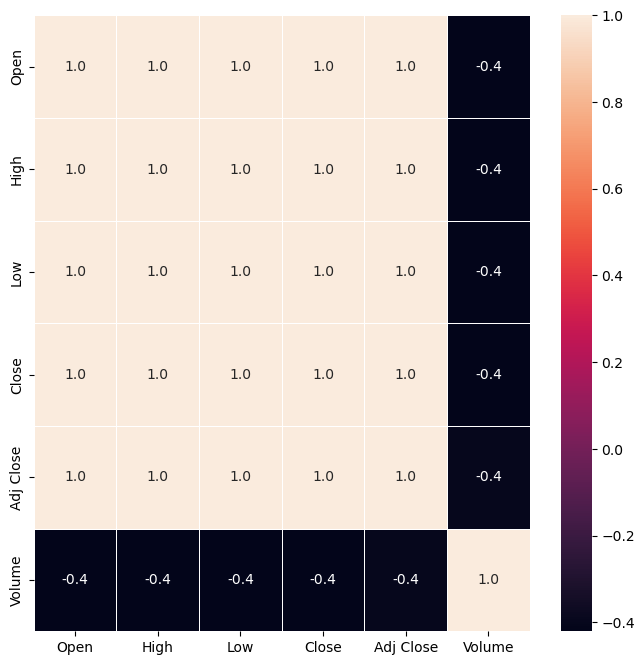

In [10]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

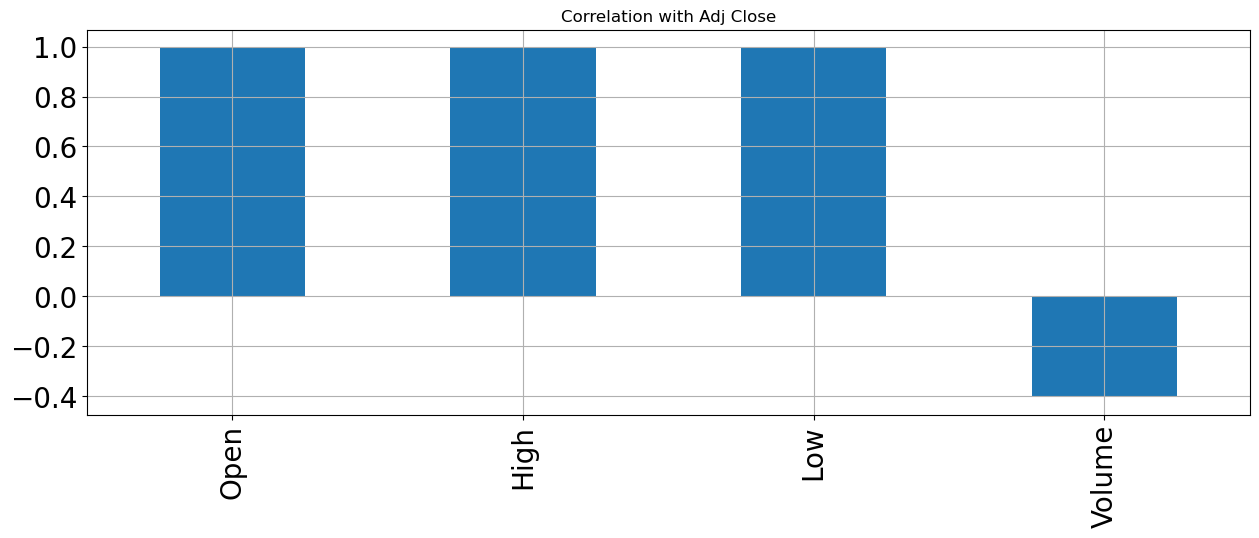

In [11]:
X=df.drop(['Adj Close','Close'],axis=1)
X.corrwith(df['Adj Close']).plot.bar(
        figsize = (15, 5), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
#data visualization

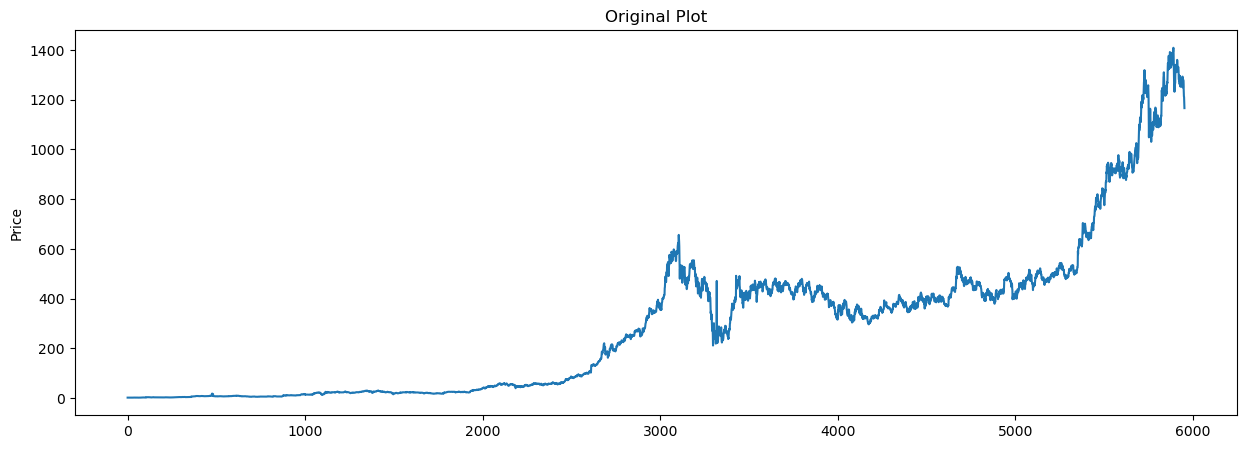

In [12]:
#very simple plotting
f,ax1 = plt.subplots(figsize=(15, 5))
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Adj Close', data = df);

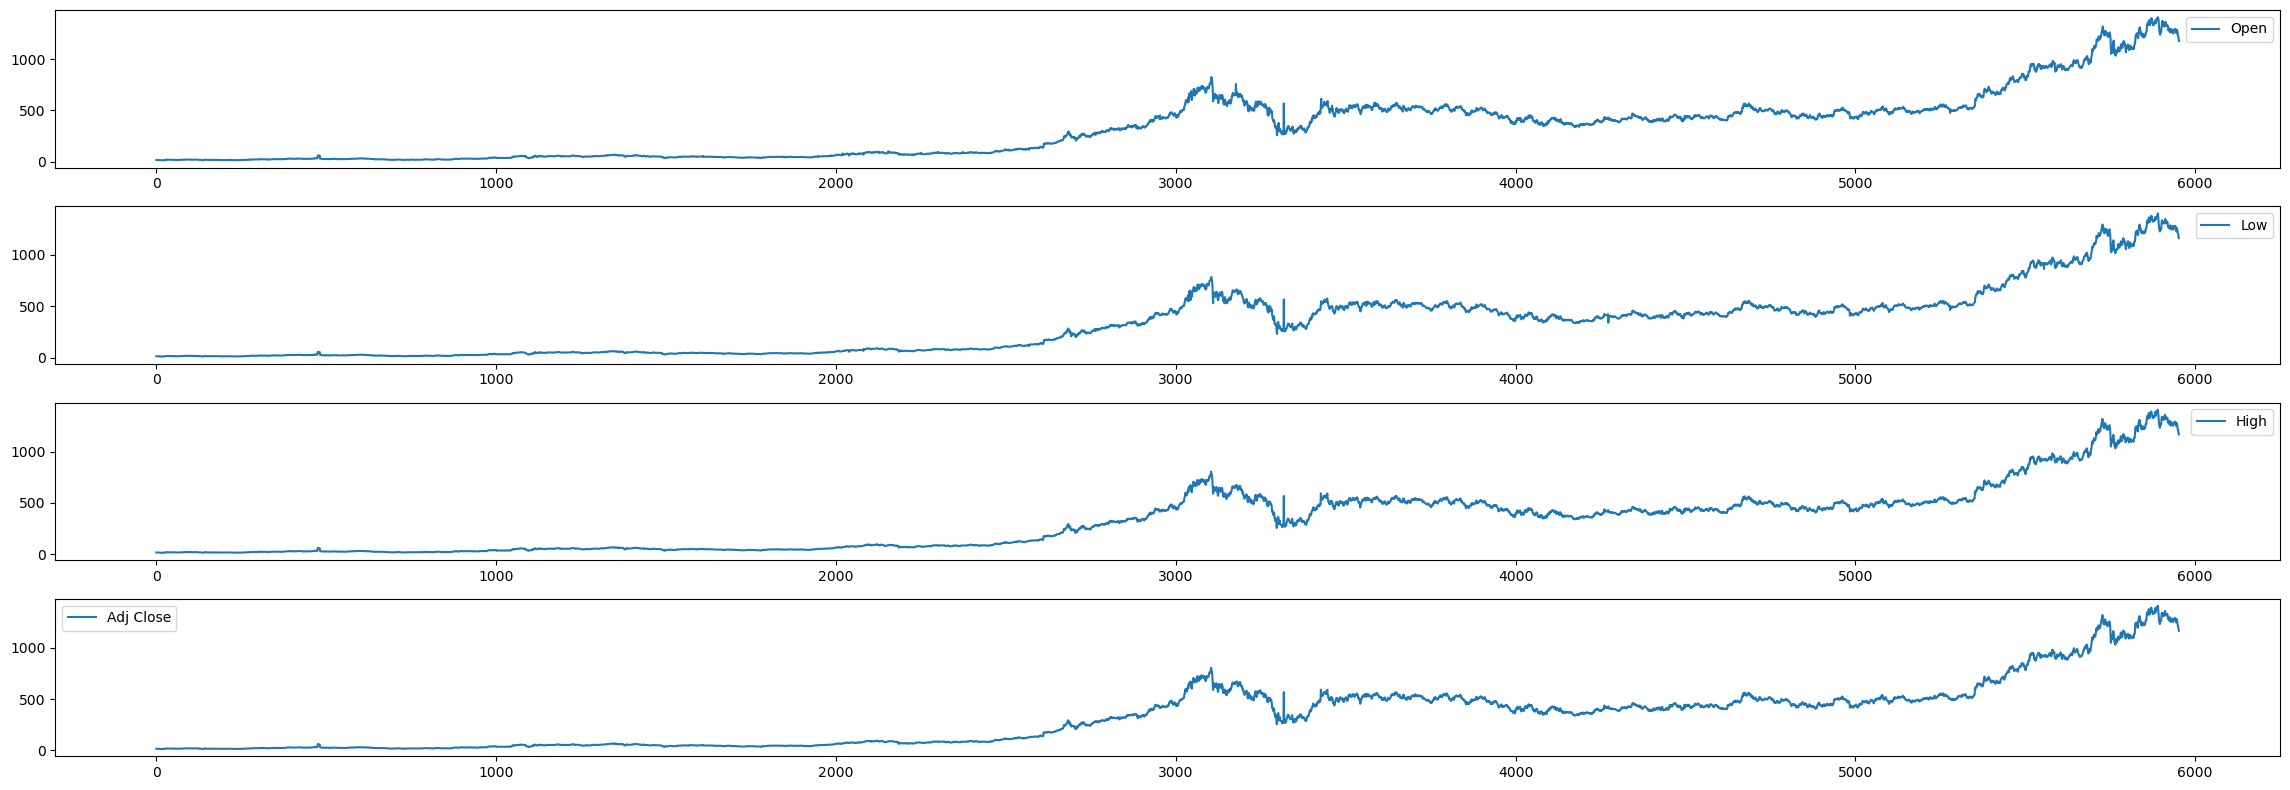

In [13]:
df.plot(figsize=(23,8),title = "Reliance Stock Price Analysis")
plt.subplot(411)
plt.plot(df.Open, label='Open')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.Low, label='Low')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.Close,label='High')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df['Close'], label='Adj Close')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
# Feature Selection
X = ['Open', 'High', 'Low', 'Volume']
y = pd.DataFrame(df['Adj Close'])

In [ ]:
#Normalizing the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(df[X])
feature_minmax_transform = pd.DataFrame(columns=X, data=feature_minmax_transform_data, index=df.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
0,0.002909,0.002518,0.002897,0.071863
1,0.002923,0.002526,0.002841,0.116464
2,0.003049,0.003121,0.002987,0.144472
3,0.002839,0.002424,0.002751,0.149701
4,0.002797,0.002346,0.002729,0.115060


In [17]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', y.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = y.shift(-1)
validation_y = y[-90:-1]
target_adj_close = y[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', y.shape)
display(y.tail())

,Open,High,Low,Volume
0,0.002909,0.002518,0.002897,0.071863
1,0.002923,0.002526,0.002841,0.116464
2,0.003049,0.003121,0.002987,0.144472
3,0.002839,0.002424,0.002751,0.149701
4,0.002797,0.002346,0.002729,0.115060


Shape of features :  (5833, 4)
Shape of target :  (5833, 1)


,Open,High,Low,Volume
5947,0.903689,0.901277,0.892794,0.010483
5948,0.896884,0.894337,0.873704,0.015050
5949,0.873603,0.875440,0.861480,0.014071
5950,0.863145,0.860848,0.857957,0.012165
5951,0.861032,0.859425,0.836997,0.014392


,Adj Close
5947,1259.099976
5948,1231.500000
5949,1213.800049
5950,1210.949951
5951,1180.900024



 -----After process------ 

Shape of features :  (5743, 4)
Shape of target :  (5833, 1)


,Adj Close
5948,1231.500000
5949,1213.800049
5950,1210.949951
5951,1180.900024
5952,1166.250000


In [ ]:
# TRAIN AND TEST

In [18]:
from sklearn.model_selection import TimeSeriesSplit
ts_split = TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(5221, 522, 5221, 522)